In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree

# Load your data
ShowData = pd.read_csv('bank-additional-full.csv', delimiter=';') # setting the datapath and using delimiter for identification
print (ShowData) #print the dataset from the excel sheet

       age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  

In [2]:
# Preprocessing
# Convert categorical variables to numeric
le = LabelEncoder()
categorical_features = [col for col in df.columns if df[col].dtype == 'object']
for col in categorical_features:
    df[col] = le.fit_transform(df[col])
   

In [3]:
# Split the data into train and test sets
X = df.drop('y', axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_dt))


Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       0.94      0.94      0.94      7303
           1       0.51      0.51      0.51       935

    accuracy                           0.89      8238
   macro avg       0.72      0.72      0.72      8238
weighted avg       0.89      0.89      0.89      8238



In [5]:
# Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Classifier report: \n\n", classification_report(y_test, y_pred_rf))

Random Forest Classifier report: 

               precision    recall  f1-score   support

           0       0.94      0.96      0.95      7303
           1       0.64      0.52      0.58       935

    accuracy                           0.91      8238
   macro avg       0.79      0.74      0.76      8238
weighted avg       0.91      0.91      0.91      8238



In [6]:
# Compare the models
print("Test Accuracy of Decision Tree: ", accuracy_score(y_test, y_pred_dt)*100, "%")
print("Test Accuracy of Random Forest: ", accuracy_score(y_test, y_pred_rf)*100, "%")


Test Accuracy of Decision Tree:  88.77154649186696 %
Test Accuracy of Random Forest:  91.28429230395727 %


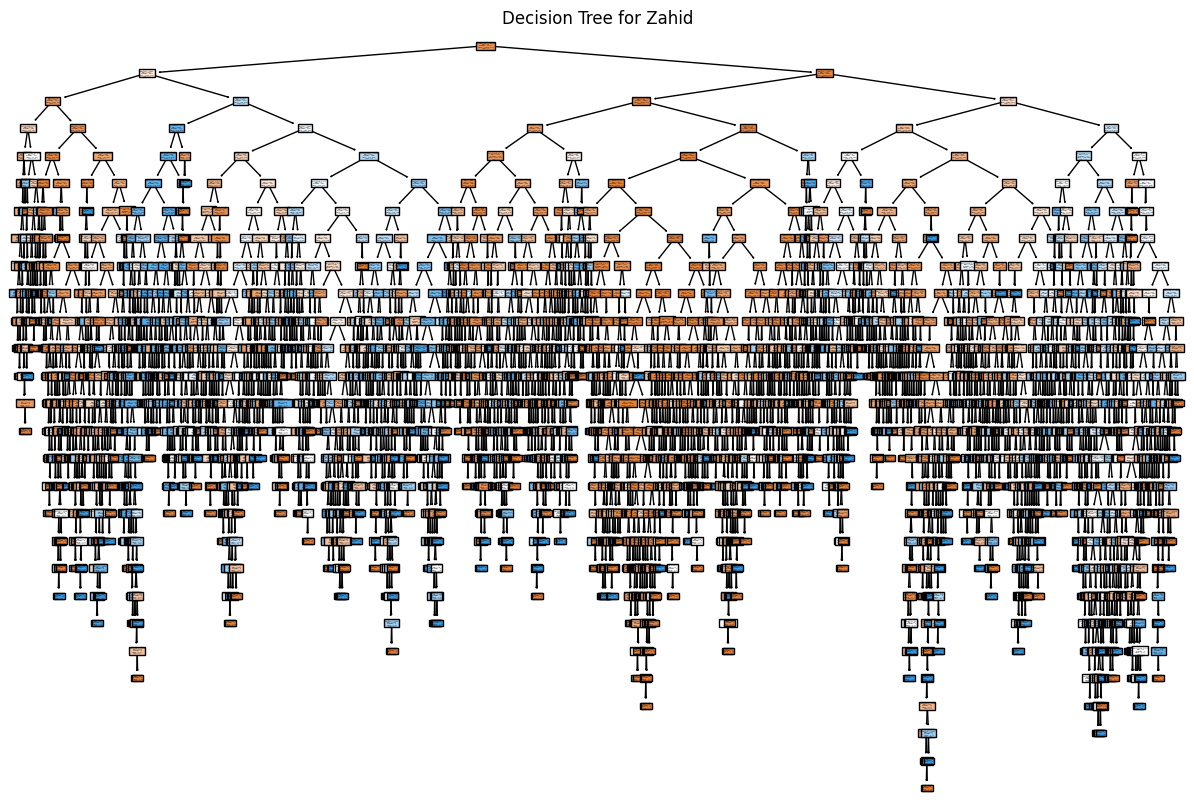

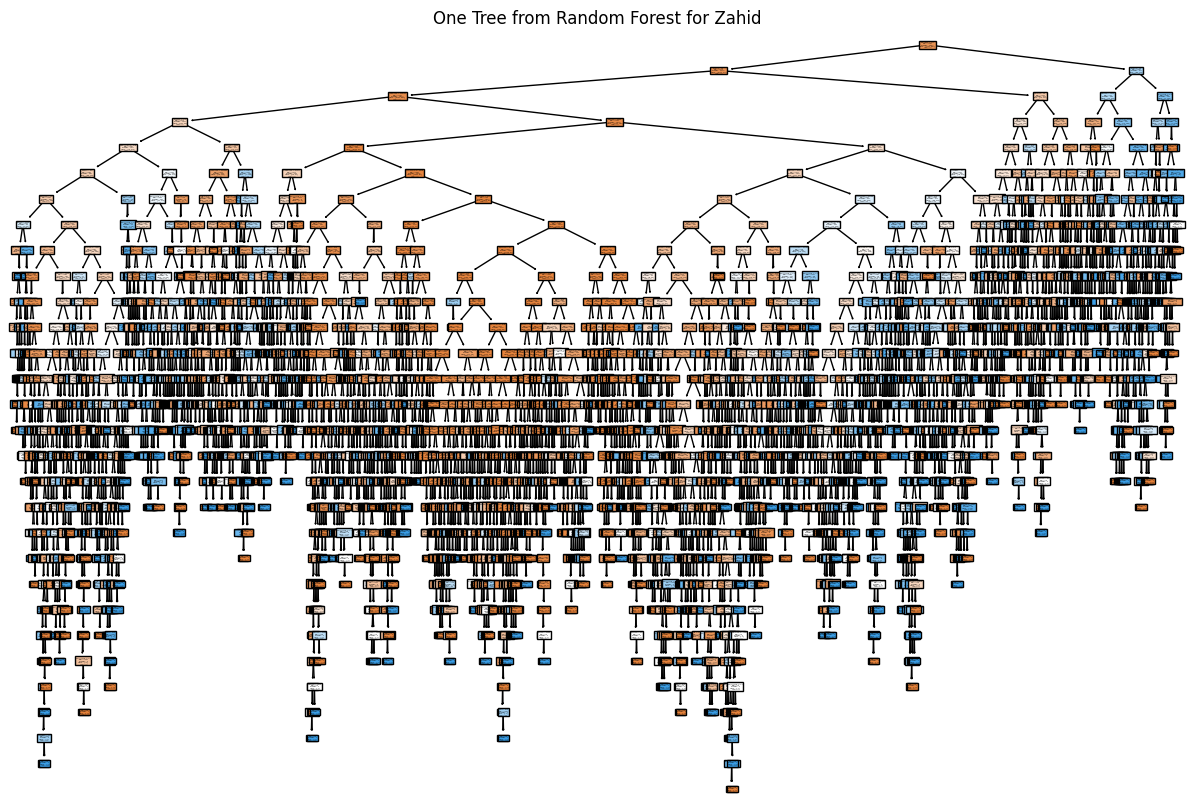

In [7]:
# Visualize Decision Tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt, 
               feature_names=X.columns,  
               class_names=['no', 'yes'],
               filled=True)
plt.title("Decision Tree for Zahid")
plt.show()

# Visualize one tree from the Random Forest
plt.figure(figsize=(15,10))
tree.plot_tree(rf.estimators_[0], 
               feature_names=X.columns,  
               class_names=['no', 'yes'],
               filled=True)
plt.title("One Tree from Random Forest for Zahid")
plt.show()